In [165]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [166]:
words = open('names.txt').read().splitlines()
chars = sorted(set(''.join(words)))
stoi = {c:i+1 for i,c in enumerate(chars)}
stoi['.'] = 0
itos = {i:ch for ch,i in stoi.items()}

In [167]:
block_size = 3

X, Y = [], []
for w in words:
    context = [0] * block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

In [181]:
X = torch.tensor(X)
Y = torch.tensor(Y)
X,Y

/var/folders/x5/7qcf1mt92k71h44cb4x2pb1h0000gn/T/ipykernel_22361/3487965575.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
/var/folders/x5/7qcf1mt92k71h44cb4x2pb1h0000gn/T/ipykernel_22361/3487965575.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y)


(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         ...,
         [26, 26, 25],
         [26, 25, 26],
         [25, 26, 24]]),
 tensor([ 5, 13, 13,  ..., 26, 24,  0]))

In [169]:
C = torch.rand((27,2))
print(C[5])
F.one_hot(torch.tensor(5),num_classes=27).float() @ C


tensor([0.8987, 0.4960])


tensor([0.8987, 0.4960])

In [170]:
emb = C[X]
emb.shape
#C is just initialized to random at the begining
C[X]
#Each character is represented as an embedding

tensor([[[0.8541, 0.8664],
         [0.8541, 0.8664],
         [0.8541, 0.8664]],

        [[0.8541, 0.8664],
         [0.8541, 0.8664],
         [0.8987, 0.4960]],

        [[0.8541, 0.8664],
         [0.8987, 0.4960],
         [0.2762, 0.7264]],

        ...,

        [[0.8742, 0.3597],
         [0.8742, 0.3597],
         [0.9686, 0.9808]],

        [[0.8742, 0.3597],
         [0.9686, 0.9808],
         [0.8742, 0.3597]],

        [[0.9686, 0.9808],
         [0.8742, 0.3597],
         [0.3023, 0.3977]]])

In [171]:
C = torch.randn(27,2)
W1 = torch.randn(6,100) #3 context size, 2 embedding dimensions (3*2 = 6) times 100 neurons
b1 = torch.randn(100)
W2 = torch.randn(100,27)
b2 = torch.randn(27)
parameters = [C,W1,b1,W2,b2]
sum(p.nelement() for p in parameters)

3481

In [172]:
for p in parameters:
    p.requires_grad=True

In [173]:
torch.randint(X.shape[0],(32,))

tensor([194340,   3754,   2893,   5198, 124086, 146131,  80504, 221801,  33120,
        120853, 105910, 187737,  91380, 104856,  35085, 157868, 181399, 128229,
        142501, 202961, 166472,  52703, 185496, 220669,  17649,  53013, 139956,
         95498, 153873, 172006, 132109, 161594])

In [186]:
for i in range(10000):
    #pick a few in random
    ix = torch.randint(X.shape[0],(32,))
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,6)@W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y[ix])
    for p in parameters:
        p.grad = None

    loss.backward()

    for p in parameters:
        p.data  += -0.1 * p.grad

In [187]:
loss

tensor(2.4436, grad_fn=<NllLossBackward0>)

In [188]:
emb = C[X]
h = torch.tanh(emb.view(-1,6)@W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Y)
loss

tensor(2.3682, grad_fn=<NllLossBackward0>)

In [176]:
C_vis = C.detach()
C_vis

tensor([[-0.2042, -0.9946],
        [ 0.2455, -0.6327],
        [ 0.2217,  0.3123],
        [ 0.3745, -0.0791],
        [ 0.3680,  0.0220],
        [ 0.1054, -0.3909],
        [ 0.3436,  0.0716],
        [ 0.1916, -0.1086],
        [ 0.5084, -0.1514],
        [-0.0076, -0.3156],
        [ 0.5291, -0.0564],
        [ 0.4697, -0.0685],
        [ 0.2147,  0.1488],
        [ 0.5101, -0.0647],
        [ 0.4524, -0.2692],
        [ 0.0895, -0.5555],
        [ 0.3553, -0.0553],
        [ 0.6031,  0.6842],
        [ 0.3975, -0.1042],
        [ 0.3477, -0.1625],
        [ 0.2751, -0.1343],
        [ 0.0461, -0.4239],
        [ 0.4213,  0.0716],
        [ 0.3473, -0.0347],
        [ 0.4499, -0.1687],
        [-0.0645, -0.3376],
        [ 0.4627, -0.0048]])

In [177]:
chars[0] = 'a'
labels = ['.']+chars
labels

['.',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

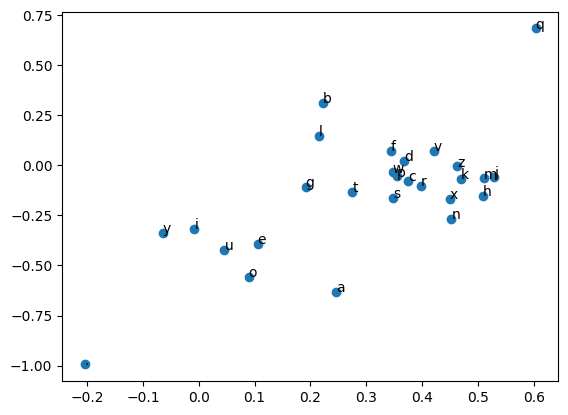

In [178]:
plt.scatter(C_vis[:,0],C_vis[:,1])
for i, label in enumerate(labels):
    plt.text(C_vis[:,0][i],C_vis[:,1][i], label)
